<a href="https://www.kaggle.com/code/sjagkoo7/heart-failure-prediction-am?scriptVersionId=141207346" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Intorduction
Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction.
* `The Dataset Features include:`
* `Age:` age of the patient [years]
* `Sex:` sex of the patient [M: Male, F: Female]
* `ChestPainType:` chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* `RestingBP:` resting blood pressure [mm Hg]
* `Cholesterol:` serum cholesterol [mm/dl]
* `FastingBS:` fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* `RestingECG:` resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* `MaxHR:` maximum heart rate achieved [Numeric value between 60 and 202]
* `ExerciseAngina:` exercise-induced angina [Y: Yes, N: No]
* `Oldpeak:` oldpeak = ST [Numeric value measured in depression]
* `ST_Slope:` the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* `HeartDisease:` output class [1: heart disease, 0: Normal]

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


# Reading the Dataset

In [2]:
heart=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [3]:
#reading first two rows of dataset
heart.head(2)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1

# Pre-Processing

In [4]:
#heart.shape
#len(heart)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


`Categorical Value = Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease`

In [5]:
#len(heart.columns)
heart.columns.to_list()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [6]:
#unique value count for each feature in dataset
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
# checking null values
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

`There is no null values present in dataset`

In [8]:
# checking duplicate values in rows
duplicate_rows_data=heart[heart.duplicated()]
duplicate_rows_data

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

`There is no duplicated rows present in dataset`

In [9]:
heart.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

# Heart dataset summary dashboard

In [10]:
summary=pd.DataFrame(index=heart.columns)
summary['count']=heart.count()
summary['nquinue']=heart.nunique()
summary['null']=heart.isna().sum()
summary['dtype']=heart.dtypes
summary=pd.concat([summary,heart.describe().T.drop('count',axis=1)],axis=1)
summary

count  nquinue  null    dtype        mean         std   min  \
Age               918       50     0    int64   53.510893    9.432617  28.0   
Sex               918        2     0   object         NaN         NaN   NaN   
ChestPainType     918        4     0   object         NaN         NaN   NaN   
RestingBP         918       67     0    int64  132.396514   18.514154   0.0   
Cholesterol       918      222     0    int64  198.799564  109.384145   0.0   
FastingBS         918        2     0    int64    0.233115    0.423046   0.0   
RestingECG        918        3     0   object         NaN         NaN   NaN   
MaxHR             918      119     0    int64  136.809368   25.460334  60.0   
ExerciseAngina    918        2     0   object         NaN         NaN   NaN   
Oldpeak           918       53     0  float64    0.887364    1.066570  -2.6   
ST_Slope          918        3     0   object         NaN         NaN   NaN   
HeartDisease      918        2     0    int64    0.553377    0.497414   0.0   

                   25%    50%    75%    max  
Age              47.00   54.0   60.0   77.0  
Sex                NaN    NaN    NaN    NaN  
ChestPainType      NaN    NaN    NaN    NaN  
RestingBP       120.00  130.0  140.0  200.0  
Cholesterol     173.25  223.0  267.0  603.0  
FastingBS         0.00    0.0    0.0    1.0  
RestingECG         NaN    NaN    NaN    NaN  
MaxHR           120.00  138.0  156.0  202.0  
ExerciseAngina     NaN    NaN    NaN    NaN  
Oldpeak           0.00    0.6    1.5    6.2  
ST_Slope           NaN    NaN    NaN    NaN  
HeartDisease      0.00    1.0    1.0    1.0

In [11]:
heart.profile_report(title='Heart EDA Summary',progress_bar=False)

# Co-Relation Matrix

In [12]:
corr=heart.corr()
corr

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<AxesSubplot:>

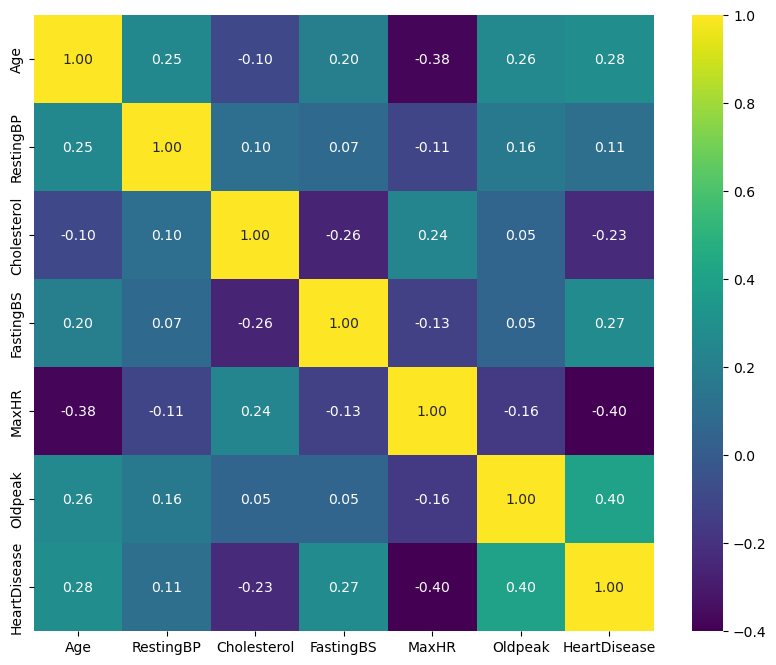

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='viridis')

> Insight
* A positive correlation means that the variables move in the same direction. Put another way, it means that as one variable increases so does the other, and conversely, when one variable decreases so does the other. A negative correlation means that the variables move in opposite directions.
* The relationship between two variables is generally considered strong when their r value is larger than 0.7.


# Visualization

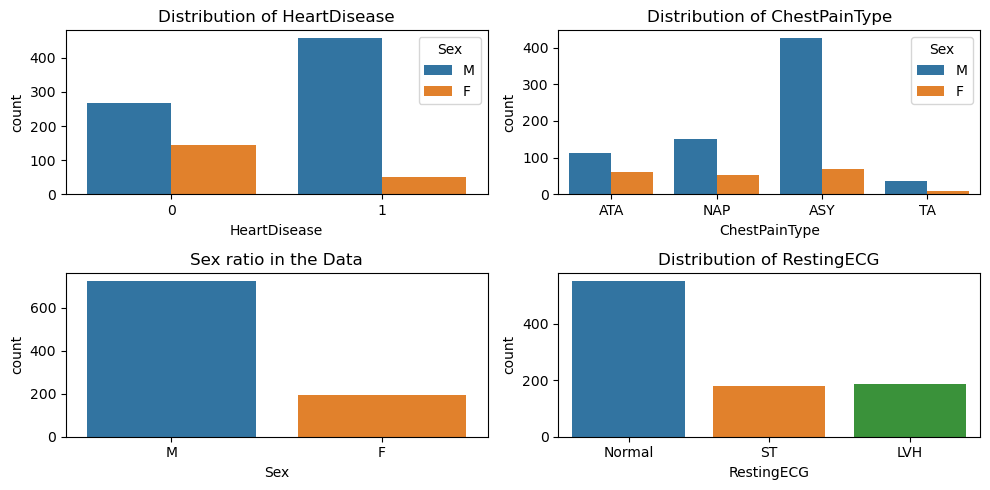

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
# HeartDisease effect based on Sex
sns.countplot(data=heart,x='HeartDisease',hue='Sex')
plt.title('Distribution of HeartDisease')
plt.subplot(2,2,2)
# ChestPainType based on Sex
sns.countplot(data=heart,x='ChestPainType',hue='Sex')
plt.title('Distribution of ChestPainType')
plt.subplot(2,2,3)
#Sex ratio
sns.countplot(data=heart,x='Sex')
plt.title('Sex ratio in the Data')
plt.subplot(2,2,4)
#Resting ECG Distribution
sns.countplot(data=heart,x='RestingECG')
plt.title('Distribution of RestingECG')
plt.tight_layout()

> Insight
* Male having higher chances of  HeartDisease as compare to Female
* ChestPainType - ASY symptoms having high in Males as compare to Female
* Male number is more as compare to Female
* Normal RestingECG is more than other RestingECG

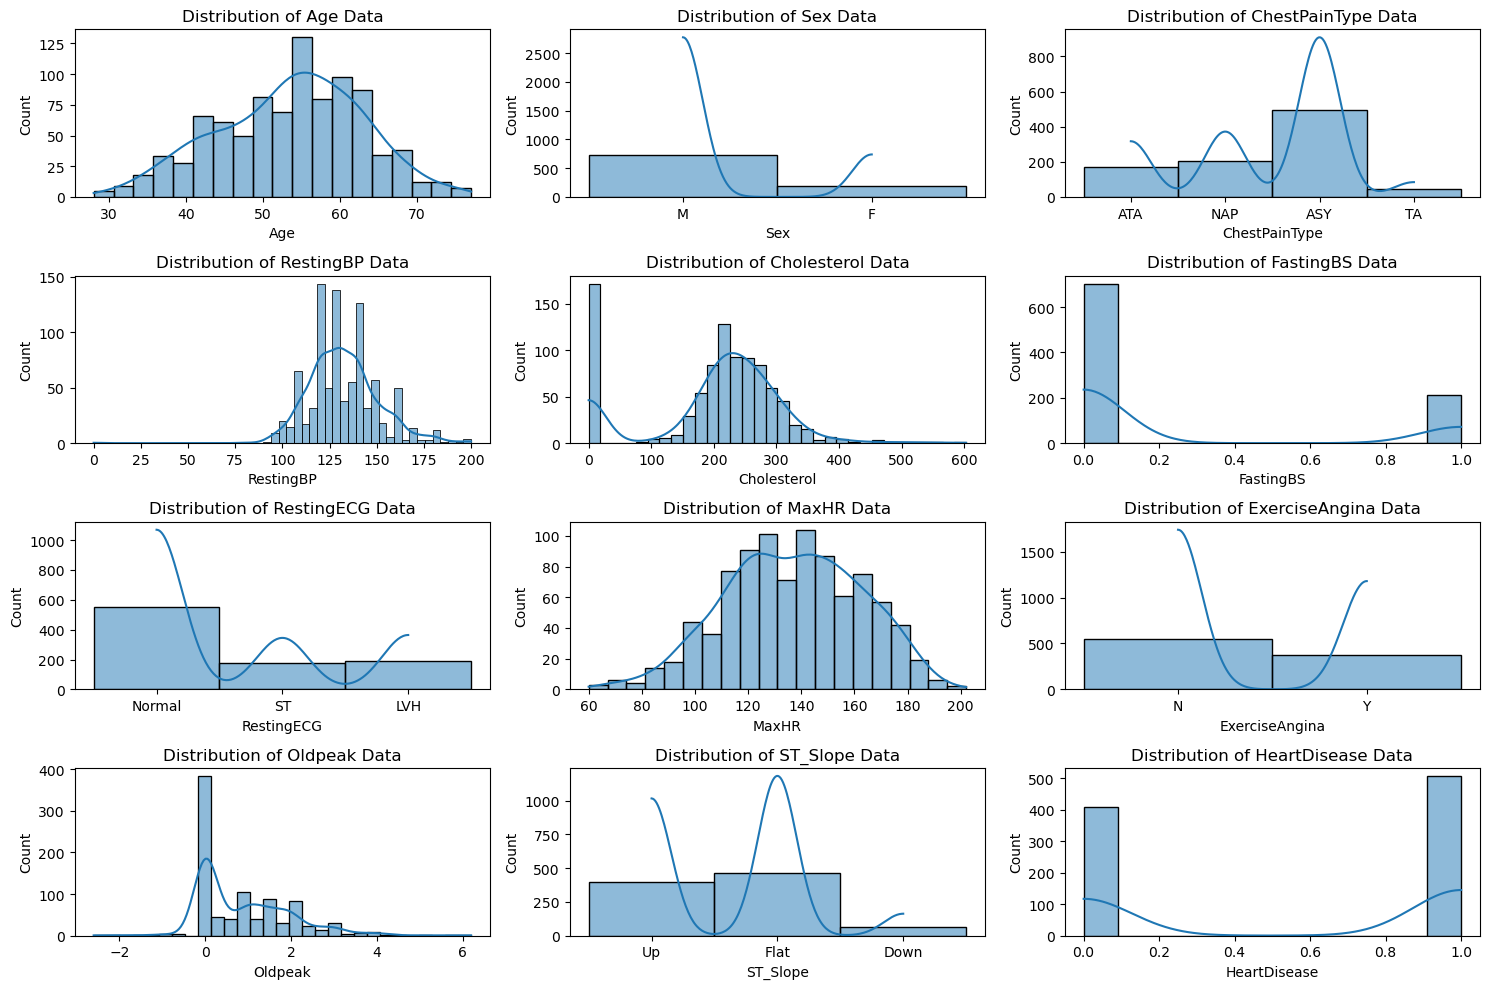

In [15]:
#feature distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(heart[col],kde=True) ##kde for lining
    plt.tight_layout() ## adjust the title and x title

# Outliers

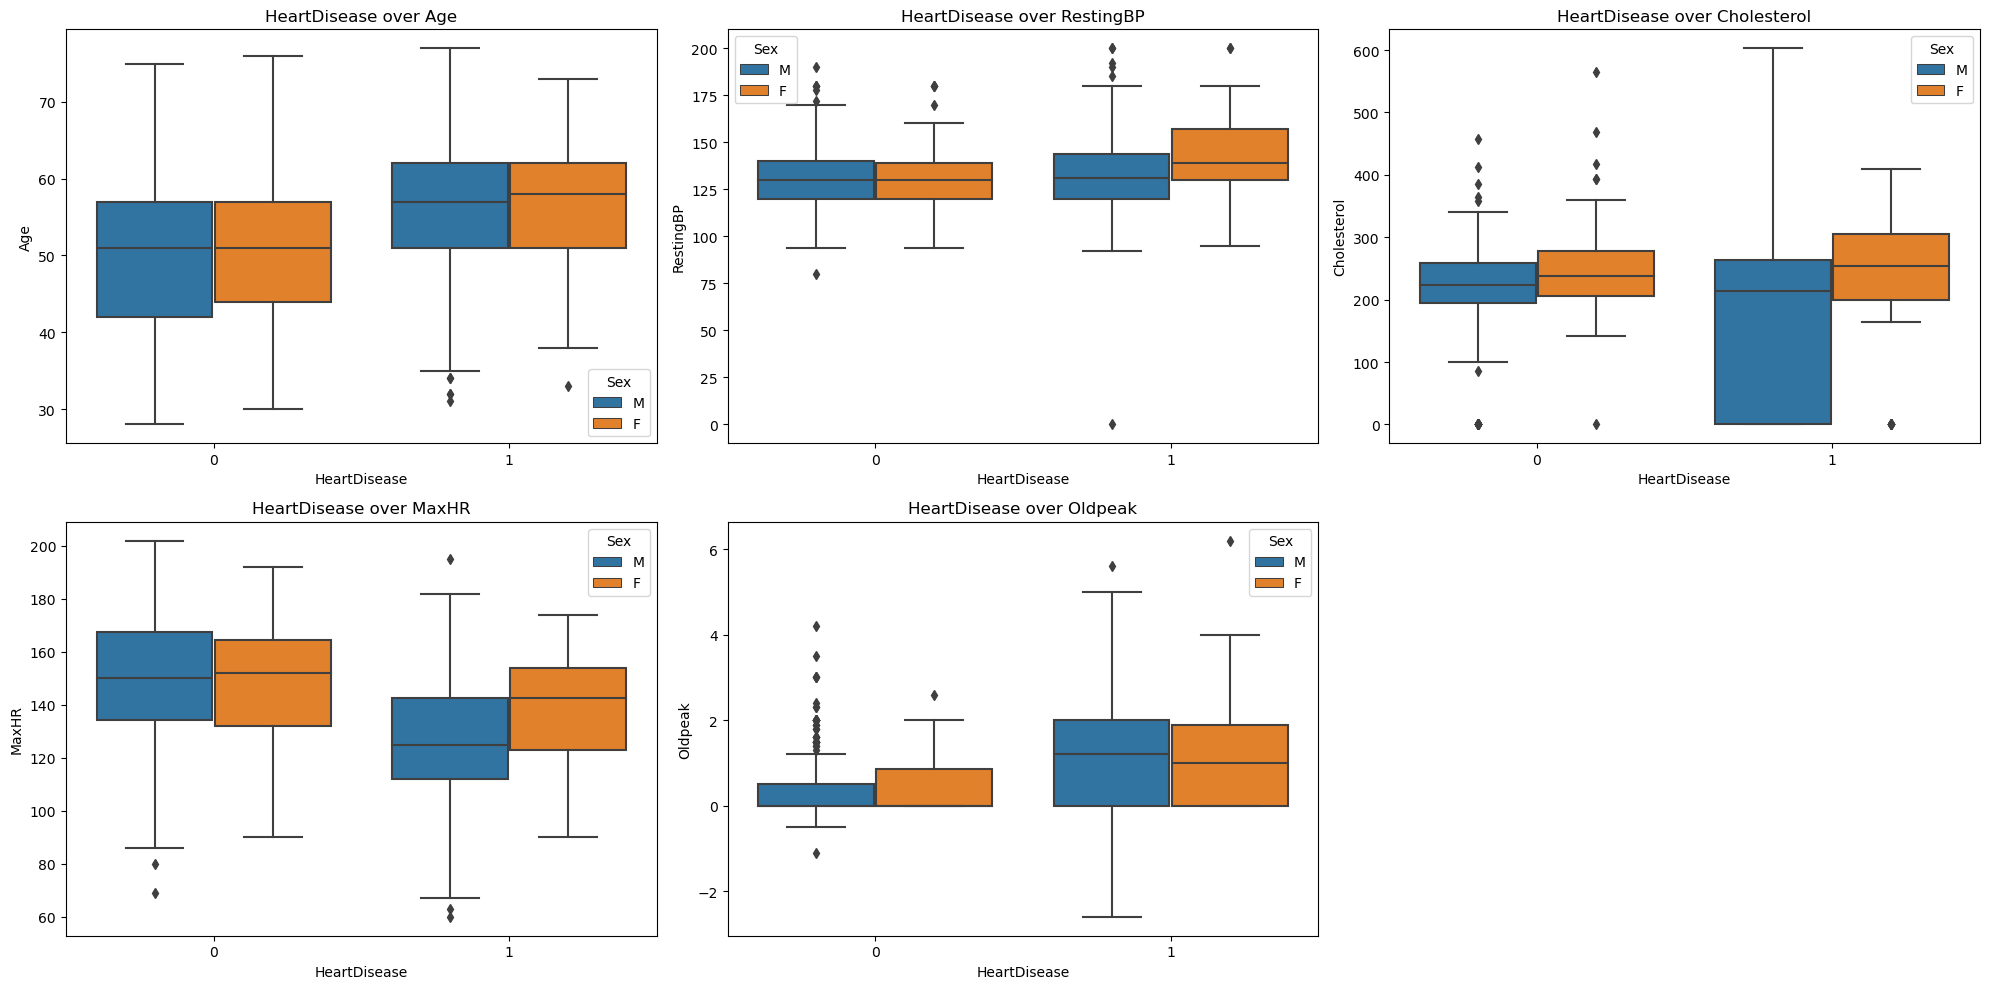

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=heart,x='HeartDisease',y='Age',hue='Sex')
plt.title('HeartDisease over Age')
plt.subplot(2,3,2)
sns.boxplot(data=heart,x='HeartDisease',y='RestingBP',hue='Sex')
plt.title('HeartDisease over RestingBP')
plt.subplot(2,3,3)
sns.boxplot(data=heart,x='HeartDisease',y='Cholesterol',hue='Sex')
plt.title('HeartDisease over Cholesterol')
plt.subplot(2,3,4)
sns.boxplot(data=heart,x='HeartDisease',y='MaxHR',hue='Sex')
plt.title('HeartDisease over MaxHR')
plt.subplot(2,3,5)
sns.boxplot(data=heart,x='HeartDisease',y='Oldpeak',hue='Sex')
plt.title('HeartDisease over Oldpeak')
plt.tight_layout()


> Insight
* **HeartDisease over Age** - Male Age 30-35 yrs. range having HeartDisease are outliers.
* **HeartDisease over RestingBP** -  Male RestingBP 175-200 range having no HeartDisease and 180-200 range having HeartDisease are outliers.
* **HeartDisease over Cholesterol** - Male + Female having Cholesterol 400+ having no HeartDisease are outliers.
* **HeartDisease over MaxHR** - no outliers.
* **HeartDisease over Oldpeak** - Male Oldpeak having greater than 1 are outliers.


# Feature Encoding

In [17]:
heart1=heart.copy()
# heart1['Sex']=heart1.Sex.map({'M':0,'F':1})
# heart1['ChestPainType']=heart1.ChestPainType.map({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3})
# heart1['RestingECG']=heart1.RestingECG.map({'Normal':0, 'ST':1, 'LVH':2})
# heart1['ExerciseAngina']=heart1.ExerciseAngina.map({'N':0, 'Y':1})
# heart1['ST_Slope']=heart1.ST_Slope.map({'Up':0, 'Flat':1, 'Down':2})
def transform_categorical_column(heart1,column_name):
    catagories=heart1[column_name].value_counts().index.to_list()
    map_cat={k:v for v,k in enumerate(catagories)}
    reverse_map_cat={v:k for k,v in map_cat.items()}
    heart1[column_name]=heart1[column_name].map(map_cat)
    return heart1,map_cat,reverse_map_cat
    
heart1,map_sex,reverse_map_sex=transform_categorical_column(heart1,'Sex')
heart1,map_ChestPainType,reverse_map_ChestPainType=transform_categorical_column(heart1,'ChestPainType')
heart1,map_RestingECG,reverse_map_RestingECG=transform_categorical_column(heart1,'RestingECG')
heart1,map_ExerciseAngina,reverse_map_ExerciseAngina=transform_categorical_column(heart1,'ExerciseAngina')
heart1,map_ST_Slope,reverse_map_ST_Slope=transform_categorical_column(heart1,'ST_Slope')

In [18]:
heart1.head(2)
#heart.head(2)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              2        140          289          0           0   
1   49    1              1        160          180          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         0             1

# Outliers - Removal

> Insight
* HeartDisease over Age - Male Age 30-35 yrs. range having HeartDisease are outliers.
* HeartDisease over RestingBP - Male RestingBP 175-200 range having no HeartDisease and 180-200 range having HeartDisease are outliers.
* HeartDisease over Cholesterol - Male + Female having Cholesterol 400+ having no HeartDisease are outliers.
* HeartDisease over MaxHR - no outliers.
* HeartDisease over Oldpeak - Male Oldpeak having greater than 1 are outliers.

In [19]:
heart1.drop(heart1[(heart1['Sex']==0) & (heart1['HeartDisease']==1) & (heart1['Age']>30) &  (heart1['Age']<35)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['RestingBP']>175)& (heart1['RestingBP']<200)& (heart1['HeartDisease']==0)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['RestingBP']>180)& (heart1['RestingBP']<200)& (heart1['HeartDisease']==1)].index,inplace=True)
heart1.drop(heart1[(heart1['Cholesterol']>400)& (heart1['HeartDisease']==0)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['Oldpeak']>1.0)].index,inplace=True)

In [20]:
#splitting input feature and traget variable
from sklearn.model_selection import train_test_split
X=heart1.drop('HeartDisease',axis=1)
y=heart1['HeartDisease']

# Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [22]:
X_scaled.head(2)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898  0.0       0.666667   0.433962     0.479270        0.0   
1  0.428571  1.0       0.333333   0.622642     0.298507        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.0  0.788732             0.0  0.295455       0.5  
1         0.0  0.676056             0.0  0.409091       0.0

In [23]:
# splitting  dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30)

# Model - Decission Tree Classifier

In [24]:
#Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score , classification_report
kf=KFold(n_splits=5)
dtree=DecisionTreeClassifier(criterion='entropy')
score=cross_val_score(dtree,X_scaled,y,cv=kf)
print(f'Decision Tree Cross Validation Score : {score}')
print(f'Decision Tree Cross Validation Score : {score.mean()}')

Decision Tree Cross Validation Score : [0.83870968 0.88709677 0.83870968 0.66129032 0.71774194]
Decision Tree Cross Validation Score : 0.7887096774193548


In [25]:
# Training & Prediction
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [26]:
#checking accuracy
dtree_acc=accuracy_score(y_test,y_pred)
dtree_acc

0.7741935483870968

In [27]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       108
           1       0.76      0.67      0.71        78

    accuracy                           0.77       186
   macro avg       0.77      0.76      0.76       186
weighted avg       0.77      0.77      0.77       186



In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[92 16]
 [26 52]]


In [29]:
#Feature importances
feature_importance=pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

ST_Slope          0.282790
Cholesterol       0.136452
ChestPainType     0.133273
MaxHR             0.120118
Oldpeak           0.083766
Age               0.079983
RestingBP         0.069295
ExerciseAngina    0.032711
FastingBS         0.027990
Sex               0.025975
RestingECG        0.007647
dtype: float64

# Model - Random Forest Classifier

# Model - XGBoost Classifier

# Model - Logistic Regression

# Comparision Between Model Accuracy